In [16]:
import numpy as np
import pandas as pd
import pymc3 as pm
import arviz as az
import matplotlib.pyplot as plt
from scipy import stats as stats

In [30]:
az.style.use('arviz-darkgrid')

In [31]:
ways = np.array([0 ,3, 8, 9])

In [32]:
ways = ways/ways.sum()

In [33]:
ways

array([0.  , 0.15, 0.4 , 0.45])

In [34]:
stats.binom.pmf(6, 9, p=0.8)

0.17616076799999994

In [35]:
#define grid
grid = np.linspace(0,1,20)

In [36]:
#define prior
prior = np.repeat(1,20)

In [37]:
#compute likelihood of each value of the grid
likelihood = stats.binom.pmf(6,9,grid)

In [38]:
#compute product of likelihood and prior
posterior = likelihood*prior

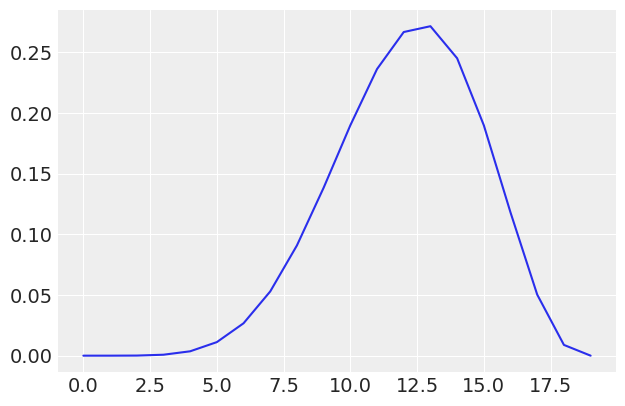

In [86]:
plt.plot(posterior)

# Build function for grid approximation

In [148]:
def binom_grid_approximation(w,n,gridpoints,prior):
    grid = np.linspace(0,1,gridpoints)
    likelyhood = stats.binom.pmf(w,n,grid)
    posterior = likelyhood * prior /(likelyhood*prior).sum()
    return grid, posterior

In [149]:
coarse_grid, coarse_posterior = binom_grid_approximation(6,9,5,np.repeat(1,5))

In [150]:
fine_grid, fine_posterior = binom_grid_approximation(6,9,100,np.repeat(1,100))

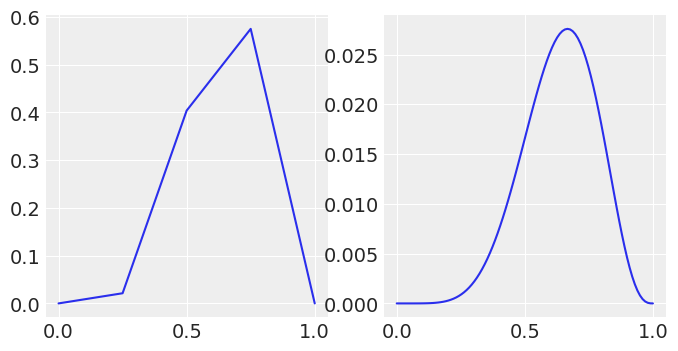

In [140]:
_,ax = plt.subplots(1,2,figsize = (8,4))
ax[0].plot(coarse_grid, coarse_posterior)
ax[1].plot(fine_grid, fine_posterior)

# Test different priors

In [155]:
prior2 = np.repeat(1,100)

In [157]:
for i in np.arange(50):
    prior2[i] = 0

In [158]:
test2 = binom_grid_approximation(6,9,100,prior2)

In [177]:
prior3=np.exp(-5*np.abs(np.linspace(0,1,100)-0.5))

In [178]:
test3 = binom_grid_approximation(6,9,100,prior3)

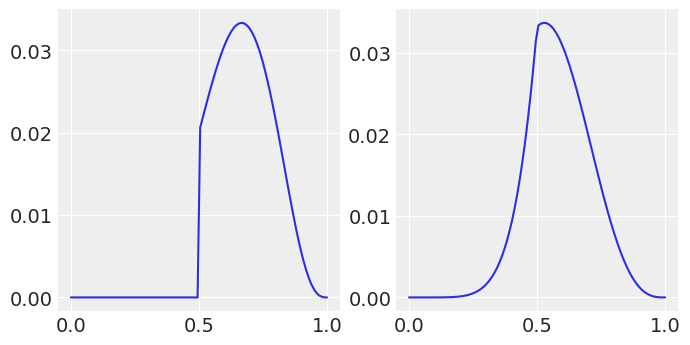

In [179]:
_,ax = plt.subplots(1,2,figsize=(8,4))
ax[0].plot(test2[0], test2[1])
ax[1].plot(test3[0], test3[1])

In [181]:
data = np.repeat((0,1),(3,6))

In [189]:
with pm.Model() as normal_approximation:
    p = pm.Uniform('p', 0, 1)
    w = pm.Binomial('w', n=len(data) , p=p, observed=data.sum())
    mean_q = pm.find_MAP()
    std_q = ((1/pm.find_hessian(mean_q, vars = [p]))**0.5)[0]
mean_q['p'], std_q

C:\Users\Mikko\AppData\Local\Continuum\anaconda3\lib\site-packages\pymc3\tuning\starting.py:61: UserWarning: find_MAP should not be used to initialize the NUTS sampler, simply call pymc3.sample() and it will automatically initialize NUTS in a better way.
  warnings.warn('find_MAP should not be used to initialize the NUTS sampler, simply call pymc3.sample() and it will automatically initialize NUTS in a better way.')
logp = -1.8075, ||grad|| = 1.5: 100%|██████████| 7/7 [00:00<00:00, 178.42it/s]


(array(0.66666667), array([0.15713484]))

In [199]:
norm = stats.norm(mean_q, std_q)
prob = 0.89
z = stats.norm.ppf([(1-prob)/2, (1+prob)/2])
pi = mean_q['p']+std_q*z
pi

array([0.41553484, 0.91779849])

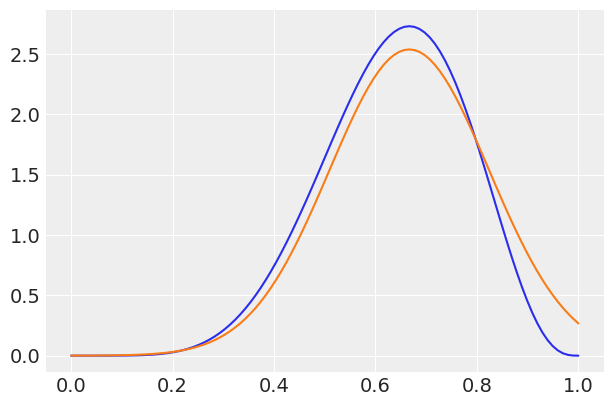

In [212]:
#analytical calculation
w,n = 6,9
x = np.linspace(0,1,100)
plt.plot(x, stats.beta.pdf(x, w+1, n-w+1), 
         label = 'True Posterior')
#quadratic approximation
plt.plot(x,stats.norm.pdf(x,mean_q['p'],std_q),
        label = 'Quadratic Approximation')


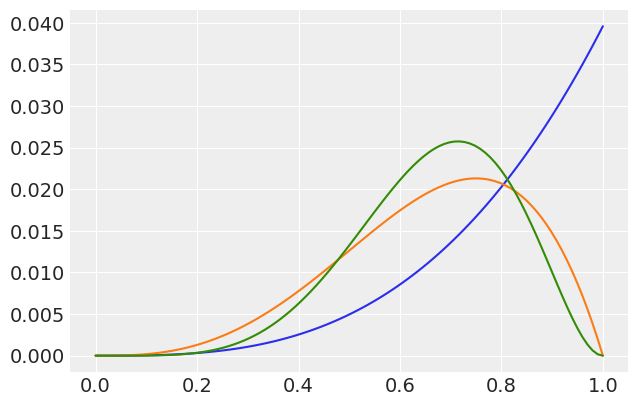

In [228]:
a=binom_grid_approximation(3,3,100,np.repeat(1,100))
b=binom_grid_approximation(3,4,100,np.repeat(1,100))
c=binom_grid_approximation(5,7,100,np.repeat(1,100))
plt.plot(a[0],a[1])
plt.plot(b[0],b[1])
plt.plot(c[0],c[1])

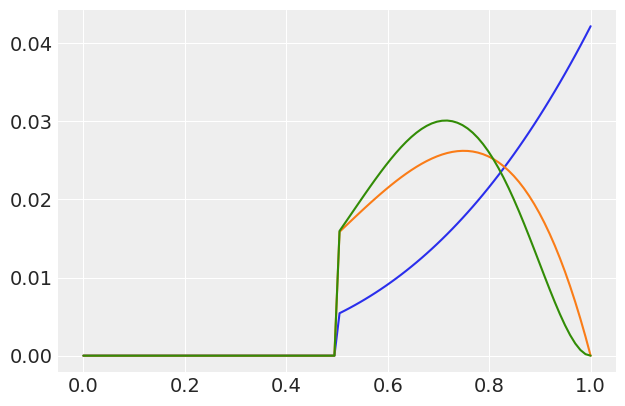

In [229]:
a=binom_grid_approximation(3,3,100,np.repeat((0,1),(50,50)))
b=binom_grid_approximation(3,4,100,np.repeat((0,1),(50,50)))
c=binom_grid_approximation(5,7,100,np.repeat((0,1),(50,5)))
plt.plot(a[0],a[1])
plt.plot(b[0],b[1])
plt.plot(c[0],c[1])

In [230]:
np.repeat((0,1),(10,10))

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

# probability of earth given that we find land

$$ Pr(Earth \mid land) = \frac{Pr(land \mid Earth)Pr(Earth)}{Pr(land)} $$

$$ Pr(land) = Pr(land \mid Earth) Pr(Earth) + Pr(land \mid Mars) Pr(Mars)$$

In [1]:
0.3*0.5/(0.3*0.5+1*0.5)

0.23076923076923075

        1            2           3

        2            1           0

2:1
2/3  

        1            2           3           4
        2            1           0           2

4:1 4/5

    BB            BW                 WW

    1               2                  3

    x               x                  x

    2               1                  0

    50%            50%

       BB             BW                   WW
   
       2              1                    0
   
     BW  WW         BB   WW
     1    2         0     2
 
     2    4               2

    6:2 = 3:1   3/4 BB

## Hard questions

       50%                 50%
        A                   B
    90%   10%          80%    20%
             10%                 20%
    

$$ Pr(2 twins) = Pr(A) Pr(twins \mid A) Pr(twins \mid A) + Pr(B) Pr(twins \mid B)  Pr(twins \mid B) $$

In [10]:
a = 0.5*0.1*0.1 + 0.5* 0.2*0.2

$$ Pr(twins) = Pr(twins\mid A)Pr(A) + Pr(twins \mid B)Pr(B)$$

In [11]:
b = 0.5*0.1 + 0.5*0.2

In [12]:
a/b

0.16666666666666669

$$ Pr(twins \mid A) = \frac{Pr(A \mid twins) Pr(twins)}{Pr(A)} $$

$$ Pr(A \mid twins) = \frac{Pr(twins \mid A)Pr(A)}{Pr(twins)}$$

In [15]:
a = 0.1 * 0.5/(0.5*0.1+0.5*0.2)
a

0.3333333333333333

$$ Pr(B \mid twins) = \frac{Pr(twins \mid B)Pr(B)}{Pr(twins)}$$

In [18]:
b = 0.2 * 0.5/(0.5*0.1+0.5*0.2)
b

0.6666666666666666

$$ Pr(A \mid twins) Pr(not twins \mid A) $$

In [20]:
a = 1/3 * 0.9

$$ Pr(B \mid twins) Pr(nottwins \mid B) $$

In [21]:
b = 2/3 * 0.8

In [22]:
a/(a+b)

0.36000000000000004

$$ Pr( Test A \mid A )  = 0.8$$ 

$$ Pr( TestA \mid B ) = 0.35 $$

In [23]:
0.5*0.8/(0.5*0.8+0.5*0.35)

0.6956521739130436

$$ Pr(A \mid TestA) = \frac{Pr(TestA \mid A) Pr(A)}{Pr(TestA)}$$

$$ Pr(TestA) = Pr(TestA \mid A)Pr(A) + Pr(Test A \mid B) Pr(B)$$

$$ Pr(A \mid TestA) = \frac{Pr(TestA \mid A) Pr(A)}{Pr(TestA \mid A)Pr(A) + Pr(Test A \mid B) Pr(B)}$$

In [26]:
0.8*0.36/(0.8*0.36+0.35*(1-0.36))

0.5625